Import libraries

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Part 1 - Data Preprocessing

PATHS

In [20]:
train_dir = r"C:\Users\henry\Desktop\Project\Medical-X-Ray-Image-Classifier-Pneumonia-Detection\chest_xray\train"
val_dir   = r"C:\Users\henry\Desktop\Project\Medical-X-Ray-Image-Classifier-Pneumonia-Detection\chest_xray\val"
test_dir  = r"C:\Users\henry\Desktop\Project\Medical-X-Ray-Image-Classifier-Pneumonia-Detection\chest_xray\test"

preprocessing the test set

## Load the Dataset

In [21]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir, image_size=(64,64), batch_size=32, label_mode='binary'
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir, image_size=(64,64), batch_size=32, label_mode='binary'
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir, image_size=(64,64), batch_size=32, label_mode='binary'
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


## Data Augmentation

In [22]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.3),
    tf.keras.layers.RandomZoom(0.3),
])

# Apply augmentation to training set only
train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))

# For val and test, just rescale to [0,1] (no augmentation)
val_ds = val_ds.map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))
test_ds = test_ds.map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))

## Flattening

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(64,64,3)),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Train & Save the Model

In [24]:
EPOCHS = 10
model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)
model.save("C:/Users/henry/Desktop/Project/detection_model.h5")  # Flattened model -> trained_model.h5

# Print summary to verify no nested "sequential_9"
model.summary()

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - accuracy: 0.7326 - loss: 0.5902 - val_accuracy: 0.6250 - val_loss: 0.6571
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step - accuracy: 0.7783 - loss: 0.4524 - val_accuracy: 0.6875 - val_loss: 0.8397
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.8330 - loss: 0.3735 - val_accuracy: 0.7500 - val_loss: 0.7203
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - accuracy: 0.8564 - loss: 0.3329 - val_accuracy: 0.6250 - val_loss: 0.8549
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 19s 113ms/step - accuracy: 0.8568 - loss: 0.3276 - val_accuracy: 0.6875 - val_loss: 1.0337
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step - accuracy: 0.8672 - loss: 0.3165 - val_accuracy: 0.5625 - val_loss: 0.9497
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 22s 132ms/step - accuracy: 0.8759 - loss: 0.2981 - val_accuracy: 0.5625 - val_loss: 1.1334
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 22s 137ms/step - accuracy: 0.8849 - loss: 0.2

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,049,989 (7.82 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,366,660 (5.21 MB)

## Reload the Saved Model

In [25]:
# Demonstrates loading from disk. Not mandatory if you prefer
# continuing with "model" in the same session.
model = tf.keras.models.load_model("detection_model.h5")
print("\nLoaded model from 'detection_model.h5' successfully.\n")
model.summary()


Loaded model from 'detection_model.h5' successfully.



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,331 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [26]:
## Confusion Matrix + Classification Report on TRAINING DS

163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 124ms/step
TRAIN set shapes => True: (5216, 1), Pred: (5216,)


<Figure size 600x600 with 0 Axes>

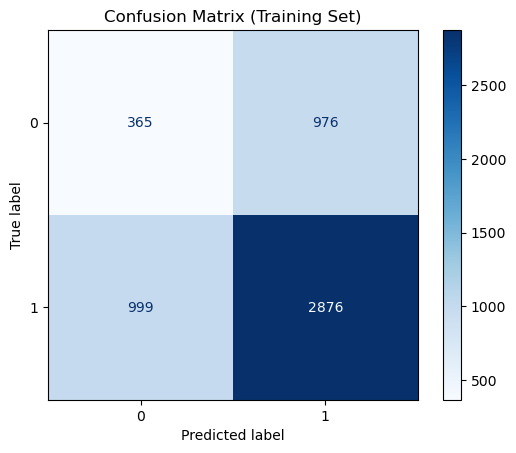


Classification Report (Training Set):
               precision    recall  f1-score   support

      Normal       0.27      0.27      0.27      1341
   Pneumonia       0.75      0.74      0.74      3875

    accuracy                           0.62      5216
   macro avg       0.51      0.51      0.51      5216
weighted avg       0.62      0.62      0.62      5216



In [27]:
# Collect true labels from train_ds
true_labels_train = []
for x_batch, y_batch in train_ds:
    true_labels_train.extend(y_batch.numpy())
true_labels_train = np.array(true_labels_train)

# Predict on train_ds
predictions_train = model.predict(train_ds)  # shape => (N,1)
predicted_labels_train = (predictions_train > 0.6).astype("int32").ravel()

print(f"TRAIN set shapes => True: {true_labels_train.shape}, Pred: {predicted_labels_train.shape}")

cm_train = confusion_matrix(true_labels_train, predicted_labels_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
plt.figure(figsize=(6,6))
disp_train.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix (Training Set)")
plt.show()

report_train = classification_report(true_labels_train, predicted_labels_train, target_names=['Normal', 'Pneumonia'])
print("\nClassification Report (Training Set):\n", report_train)


## Confusion Matrix + Classification Report on VAL_DS

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
VAL set shapes => True: (16, 1), Pred: (16,)


<Figure size 600x600 with 0 Axes>

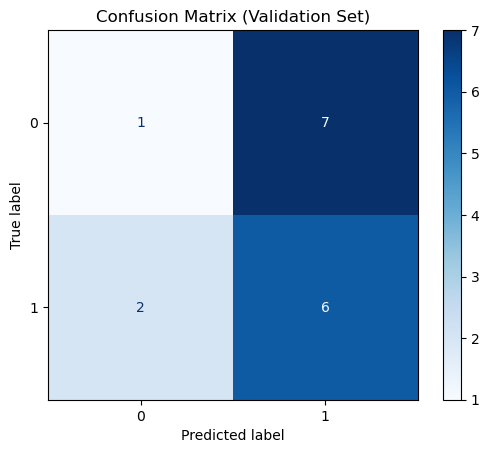


Classification Report (Validation Set):
               precision    recall  f1-score   support

      Normal       0.33      0.12      0.18         8
   Pneumonia       0.46      0.75      0.57         8

    accuracy                           0.44        16
   macro avg       0.40      0.44      0.38        16
weighted avg       0.40      0.44      0.38        16



In [28]:
# Collect true labels from val_ds
true_labels_val = []
for x_batch, y_batch in val_ds:
    true_labels_val.extend(y_batch.numpy())
true_labels_val = np.array(true_labels_val)

# Predict on val_ds
predictions_val = model.predict(val_ds)
predicted_labels_val = (predictions_val > 0.6).astype("int32").ravel()

print(f"VAL set shapes => True: {true_labels_val.shape}, Pred: {predicted_labels_val.shape}")

cm_val = confusion_matrix(true_labels_val, predicted_labels_val)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val)
plt.figure(figsize=(6,6))
disp_val.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix (Validation Set)")
plt.show()

report_val = classification_report(true_labels_val, predicted_labels_val, target_names=['Normal', 'Pneumonia'])
print("\nClassification Report (Validation Set):\n", report_val)